In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"


while True:
    query_params = {
        'api_token': api_key,
        'sort': 'market_capitalization.desc',
        'filters': '[["exchange","=","NYSE"],["sector","=","Energy"]]',
        'limit': str(limit),
        'offset': str(offset)
    }

    encoded_params = urlencode(query_params)
    final_url = f"{base_url}?{encoded_params}"
    response = requests.get(final_url).json()
    print(response)
    data = response['data']
    if not data:
        break
    all_data.extend(data)
    offset += limit

query_params = {
    'api_token': api_key,
    'sort': 'market_capitalization.desc',
    'filters': '[["exchange","=","NASDAQ"],["sector","=","Energy"]]',
    'limit': '100',
    'offset': '0'
}
from urllib.parse import urlencode
encoded_params = urlencode(query_params)
final_url = f"{base_url}?{encoded_params}"
data_NASDAQ = requests.get(final_url).json()
print(data_NASDAQ['data'])
all_data.extend(data_NASDAQ['data'])
print(len(all_data))
Energydf = pd.DataFrame(all_data)
print(Energydf)

{'data': [{'code': 'XOM', 'name': 'Exxon Mobil Corp', 'last_day_data_date': '2024-06-06', 'adjusted_close': 113.97, 'refund_1d': 0.85, 'refund_1d_p': 0.75, 'refund_5d': -0.02, 'refund_5d_p': -0.02, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 511261442048, 'earnings_share': 8.16, 'dividend_yield': 0.0333, 'sector': 'Energy', 'industry': 'Oil & Gas Integrated', 'avgvol_1d': 13103949, 'avgvol_200d': 18972432.29}, {'code': 'CVX', 'name': 'Chevron Corp', 'last_day_data_date': '2024-06-06', 'adjusted_close': 155.93, 'refund_1d': 0.95, 'refund_1d_p': 0.61, 'refund_5d': -2.33, 'refund_5d_p': -1.47, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 285164765184, 'earnings_share': 10.87, 'dividend_yield': 0.0418, 'sector': 'Energy', 'industry': 'Oil & Gas Integrated', 'avgvol_1d': 5215140, 'avgvol_200d': 8775023.56}, {'code': 'SHEL', 'name': 'Shell PLC ADR', 'last_day_data_date': '2024-06-06', 'adjusted_close': 70.25, 'refund_1d': 0.44, 'refund_1d_p': 0.63

In [4]:
financial_list = []
for i in range(Energydf.size):
    try:
        code = Energydf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

XOM
CVX
SHEL
TTE
COP
BP
PBR
PBR-A
EQNR
ENB
CNQ
EOG
SLB
MPC
EPD
PSX
OXY
ET
VLO
WMB
SU
E
OKE
HES
KMI
MPLX
TRP
LNG
CVE
IMO
WDS
HAL
DVN
TRGP
EC
CCJ
CQP
PBA
CTRA
TS
EQT
MRO
WES
TPL
OVV
PR
YPF
AR
FTI
DINO
RRC
HESM
SWN
SUN
MTDR
AM
NOV
CIVI
DTM
ETRN
MUR
NE
FRO
ENLC
PBF
SM
VVV
NFG
VAL
TDW
VRN
MGY
CSAN
UGP
RIG
STNG
VIST
CNX
NXE
NOG
LBRT
TGS
HP
STR
CRK
SDRL
AESI
BSM
CRC
EURN
WHD
INSW
BTU
AROC
CEIX
GPOR
BTE
USAC
KOS
CVI
UEC
TNK
XPRO
KNTK
KGS
CRGY
OII
LPG
TALO
DNN
DHT
EE
DKL
VET
NGL-PB
NGL-PC
KRP
MNR
GLP
DK
VTLE
BORR
WKC
HLX
GEL
FLNG
PARR
DO
RES
NVGS
SLCA
NRP
MRC
UUUU
PDS
SBOW
PUMP
SBR
VTOL
TNP
TK
CLB
GRNT
EU
NGL
CAPL
LEU
VTS
NR
DEC
NBR
TXO
CLCO
EGY
OSG
EFXT
DRQ
TELL
REPX
GPRK
PBT
NOA
OBE
SD
TTI
URG
GFR
SGU
SOI
SMLP
REI
TNP-PE
TNP-PF
WTI
GTE
OIS
NGS
NC
RNGR
AMPY
FET
EP
SJT
EPM
DLNG
FTK
PHX
MVO
BATL
DLNG-PB
VOC
CRT
PED
AE
NRT
NINE
BPT
PRT
PVL
SDPI
INDO
CKX
CEI
BRN
MXC
ICD
MTR
HUSA
TPET
ENSV
GLP-PB
SEAL-PA
SEAL-PB
ET-PI
SOC
CPG
FANG
BKR
PAA
CHK
APA
CHRD
WFRD
IEP
VNOM
CHX
CHKEL
CHKEZ
PTEN
PAGP
TRMD
AR

In [5]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    return price

In [6]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [7]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [8]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [9]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [18]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [19]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


WDS EPS Zero error
TPL has no debt data in database
YPF has no Dividend Paid
SWN has no Dividend Paid
VIST has no Dividend Paid
NXE has no Dividend Paid
BSM has no debt data in database
UEC has no debt data in database
TALO has no Dividend Paid
DNN has no Dividend Paid
NGL-PB EPS Zero error
VTLE has no Dividend Paid
UUUU has no Dividend Paid
PDS has no Dividend Paid
PUMP has no Dividend Paid
SBR has no debt data in database
EU has no Dividend Paid
LEU has no Dividend Paid
DEC Share probably zero: unsupported operand type(s) for /: 'NoneType' and 'float'
DRQ has no debt data in database
TELL has no Dividend Paid
PBT has no debt data in database
SD has no debt data in database
TNP-PE EPS Zero error
OIS has no Dividend Paid
NGS has no Dividend Paid
AMPY has no Dividend Paid
EP has no Dividend Paid
SJT has no debt data in database
MVO has no debt data in database
VOC has no debt data in database
CRT has no debt data in database
PED has no debt data in database
NRT has no debt data in datab

In [20]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

199
199
199
199
199


In [21]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

df.to_csv('Energy7.csv', index=False)

In [29]:
df = pd.read_csv('Energy7.csv')

In [30]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(50,'Debt'))
top_50s.append(positive_df.nlargest(50,'Dividend Yield'))
top_50s.append(positive_df.nlargest(50,'EPS Yield'))
top_50s.append(positive_df.nlargest(50,'FCF'))
worst_100s.append(positive_df.nlargest(100, 'Debt'))
worst_100s.append(positive_df.nsmallest(100, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(100, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(100, 'FCF'))


combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]


In [31]:
print(final_selection.shape)
print(final_selection)

(21, 5)
      Code       Debt  Dividend Yield  EPS Yield        FCF
14      TK 0.21399358      0.62622657 0.22870879 0.89904372
15     TNK 0.21605751      0.03933354 0.22924157 0.33138035
20     SOI 0.35666730      0.06487830 0.08650519 0.15639273
21    ARLP 0.39695505      0.14172024 0.22942643 0.17970605
23     TXO 0.40627627      0.12463120 0.10194986 0.13631228
24     PBR 0.43174823      0.20135281 0.24786325 0.30667096
25   PBR-A 0.43174823      0.20554203 0.25302013 0.31305137
27     CNQ 0.44116804      0.04942504 0.09748428 0.11243000
30    EQNR 0.51919996      0.13544997 0.12023677 0.09933927
34      HP 0.61882006      0.04404386 0.08535426 0.08603611
35     NRP 0.61903901      0.07324068 0.14714674 0.25963383
41    INSW 0.70985628      0.10406997 0.19285714 0.17345450
42      SU 0.71901458      0.05821698 0.13952858 0.16811444
48     DVN 0.82252213      0.04922154 0.10761259 0.08828975
49     TTE 0.83365465      0.04778285 0.12988522 0.13586199
63     LPG 1.43329937      0.141

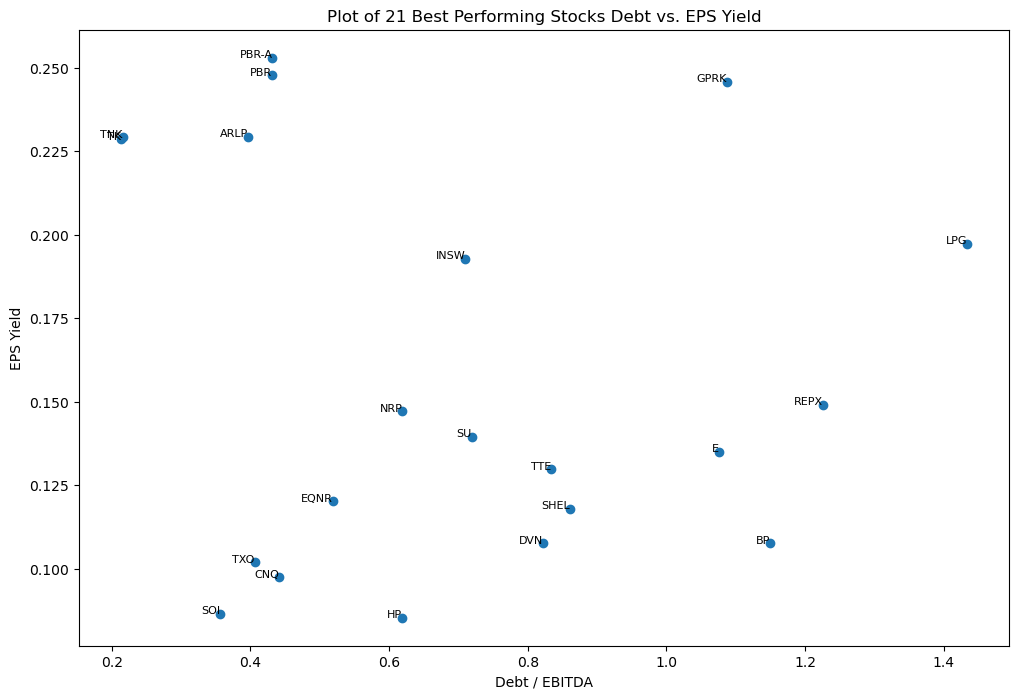

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('EPS Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield']) 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of 21 Best Performing Stocks Debt vs. EPS Yield')
plt.savefig('Best21_Debt_EPS_fixed.png')
plt.show()

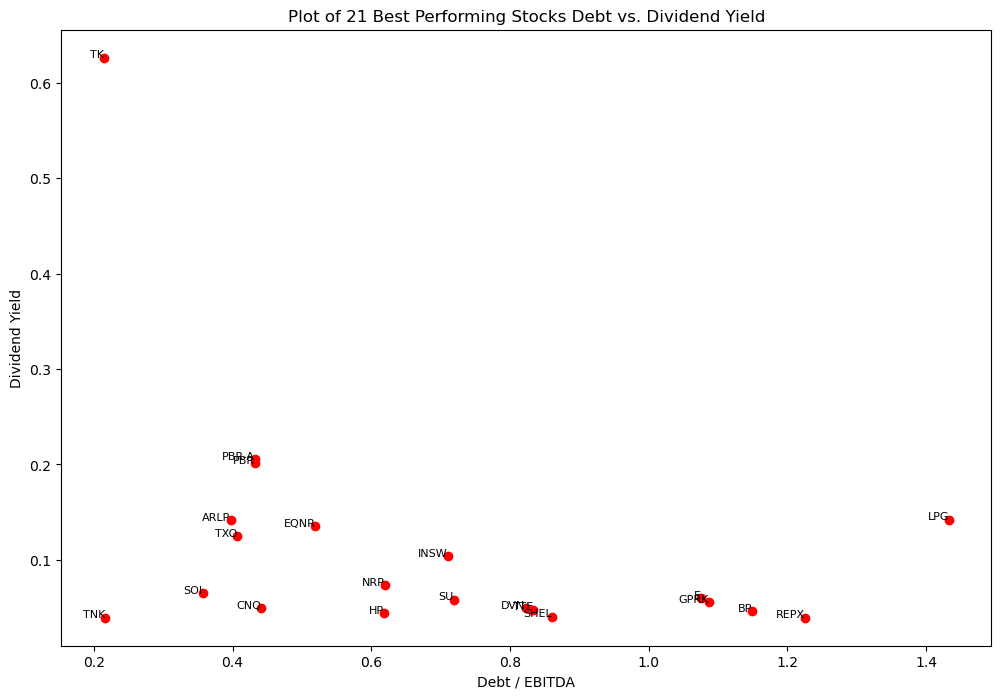

In [33]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('Dividend Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['Dividend Yield'], c='r') 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of 21 Best Performing Stocks Debt vs. Dividend Yield')
plt.savefig('Best21_Debt_Div_fixed.png')
plt.show()

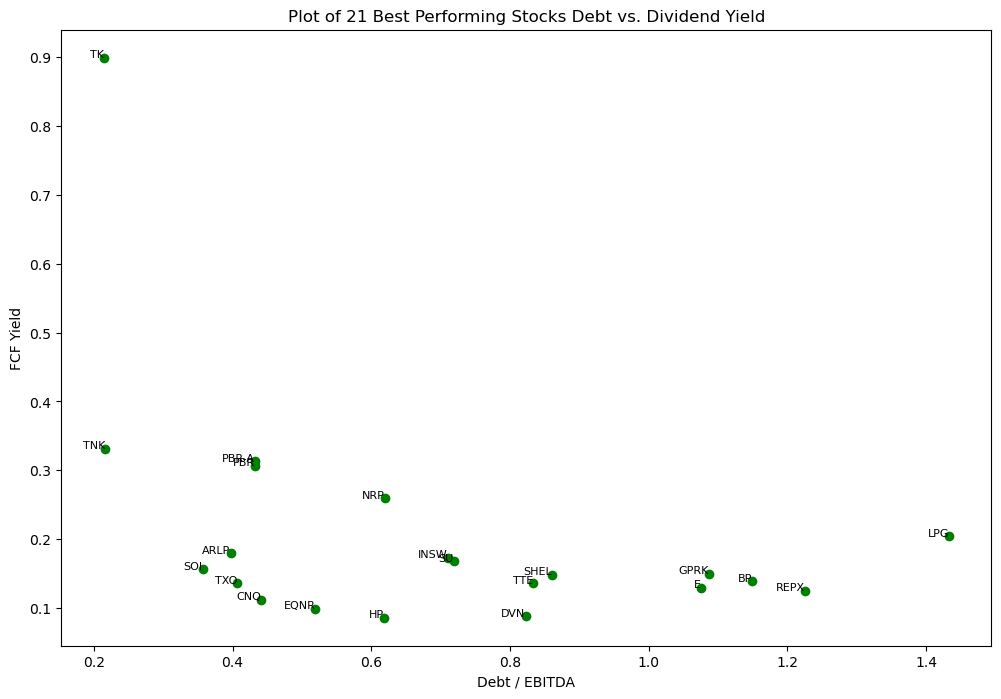

In [26]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('FCF Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['FCF'], c='g') 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of 21 Best Performing Stocks Debt vs. Dividend Yield')
plt.savefig('Best21_Debt_FCF_fixed.png')
plt.show()

In [13]:
CHRD_finan = api.get_fundamentals_data('CHRD')
CHRD_price = api.get_eod_historical_stock_market_data(symbol='CHRD.US',from_date='2024-03-28',to_date='2024-03-28')[0]['close']

In [34]:
price = api.get_eod_historical_stock_market_data(symbol='CHRD.US',from_date='2024-03-28',to_date='2024-03-28')

In [35]:
print(price[0]['adjusted_close'])
print(price[0]['close'])

177.0148
178.24


In [14]:
CHRD_Div1 = float(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
CHRD_Div2 = float(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
CHRD_Div3 = float(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])
CHRD_Div4 = float(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2023-06-30']['dividendsPaid'])
print(CHRD_Div1)
print(CHRD_Div2)
print(CHRD_Div3)
print(CHRD_Div4)
print(CHRD_Div1 + CHRD_Div2 + CHRD_Div3 + CHRD_Div4)
CHRD_div = get_dividend(CHRD_finan)
print(get_dividend(CHRD_finan))
CHRD_share = get_shares(CHRD_finan)
CHRD_divY = CHRD_div/CHRD_share / CHRD_price
print(CHRD_divY)
print(CHRD_finan['Highlights']['DividendYield'])

-152389000.0
-105652000.0
56905000.0
135274000.0
-65862000.0
-65862000.0
-0.00592421783291872
0.0598


In [17]:
print(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2023-03-31']['dividendsPaid'])
print(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2022-12-31']['dividendsPaid'])
print(CHRD_finan['Financials']['Cash_Flow']['quarterly']['2022-09-30']['dividendsPaid'])
div = abs(CHRD_Div1) + abs(CHRD_Div2) + CHRD_Div3 + CHRD_Div4
print(abs(CHRD_Div1) + abs(CHRD_Div2) + CHRD_Div3 + CHRD_Div4)
print(div/CHRD_share / CHRD_price)
print(CHRD_finan['Highlights']['DividendYield'])

202473000.00
154622000.00
360246000.00
450220000.0
0.04049681687067909
0.0598


In [74]:
EC_finan = api.get_fundamentals_data("EC")
EC_price = api.get_eod_historical_stock_market_data(symbol='EC.US',from_date='2024-03-28',to_date='2024-03-28')[0]['close']

In [91]:
ET_finan = api.get_fundamentals_data("ET")
print(get_EPS(ET_finan))
EPS1 = ET_finan['Earnings']['History']['2024-03-31']['epsActual']
EPS2 = ET_finan['Earnings']['History']['2023-12-31']['epsActual']
EPS3 = ET_finan['Earnings']['History']['2023-09-30']['epsActual']
EPS4 = ET_finan['Earnings']['History']['2023-06-30']['epsActual']
EPS5 = ET_finan['Earnings']['History']['2023-03-31']['epsActual']
print(EPS1+EPS2+EPS3+EPS4)
print(EPS5+EPS2+EPS3+EPS4)
print(ET_finan['Highlights']['EarningsShare'])

0.32
1.27
1.27
1.09


In [138]:
ET_div1 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
ET_div2 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
ET_div3 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])
ET_div4 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-06-30']['dividendsPaid'])
ET_div = (ET_div1+ET_div2+ET_div3+ET_div4)
ET_share = get_shares(ET_finan)
ET_price = float(get_price('ET')[0]['close'])
print(get_dividend(ET_finan)/ET_share/ET_price)
print(ET_div/ET_share/ET_price)
print(ET_finan['Highlights']['DividendYield'])

0.08253094997245433
0.08253094997245433
0.0826


In [140]:
FANG_finan = api.get_fundamentals_data("FANG")


FANG_div1 = float(FANG_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
FANG_div2 = float(FANG_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
FANG_div3 = float(FANG_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])
FANG_div4 = float(FANG_finan['Financials']['Cash_Flow']['quarterly']['2023-06-30']['dividendsPaid'])
FANG_div = (FANG_div1+FANG_div2+FANG_div3+FANG_div4)
FANG_share = get_shares(FANG_finan)
FANG_price = float(get_price('FANG')[0]['close'])
print(get_dividend(FANG_finan)/FANG_share/FANG_price)
print(FANG_div/FANG_share/FANG_price)
print(FANG_finan['Highlights']['DividendYield'])

0.04102717272997236
0.04102717272997236
0.0485


In [101]:
print(get_EPS(ET_finan))
EPS1 = ET_finan['Earnings']['History']['2024-03-31']['epsActual']
EPS2 = ET_finan['Earnings']['History']['2023-12-31']['epsActual']
EPS3 = ET_finan['Earnings']['History']['2023-09-30']['epsActual']
EPS4 = ET_finan['Earnings']['History']['2023-06-30']['epsActual']
EPS5 = ET_finan['Earnings']['History']['2023-03-31']['epsActual']
print(EPS1+EPS2+EPS3+EPS4)
print(EPS5+EPS2+EPS3+EPS4)
print(ET_finan['Highlights']['EarningsShare'])

1.27
1.27
1.27
1.09


In [99]:
FCF1 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['freeCashFlow'])
FCF2 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['freeCashFlow'])
FCF3 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['freeCashFlow'])
FCF4 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-06-30']['freeCashFlow'])
FCF5 = float(ET_finan['Financials']['Cash_Flow']['quarterly']['2023-03-31']['freeCashFlow'])
print(FCF1+FCF2+FCF3+FCF4)
print(get_FCF(ET_finan))

6924000000.0
6924000000.0


In [114]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum

In [115]:
print(get_ebitda(ET_finan))
EBITDA1 = float(ET_finan['Financials']['Income_Statement']['quarterly']['2024-03-31']['ebitda'])
EBITDA2 = float(ET_finan['Financials']['Income_Statement']['quarterly']['2023-12-31']['ebitda'])
EBITDA3 = float(ET_finan['Financials']['Income_Statement']['quarterly']['2023-09-30']['ebitda'])
EBITDA4 = float(ET_finan['Financials']['Income_Statement']['quarterly']['2023-06-30']['ebitda'])
EBITDA5 = float(ET_finan['Financials']['Income_Statement']['quarterly']['2023-03-31']['ebitda'])
print(EBITDA1+EBITDA2+ EBITDA3+EBITDA4)
print(EBITDA5+EBITDA2+ EBITDA3+EBITDA4)
print(ET_finan['Highlights']['EBITDA'])

10180000000.0
10180000000.0
8720000000.0
13203999744


In [92]:
SHEL_finan = api.get_fundamentals_data("SHEL")
print(get_EPS(SHEL_finan))
EPS1 = SHEL_finan['Earnings']['History']['2024-03-31']['epsActual']
EPS2 = SHEL_finan['Earnings']['History']['2023-12-31']['epsActual']
EPS3 = SHEL_finan['Earnings']['History']['2023-09-30']['epsActual']
EPS4 = SHEL_finan['Earnings']['History']['2023-06-30']['epsActual']
EPS5 = ET_finan['Earnings']['History']['2023-03-31']['epsActual']
print(EPS1+EPS2+EPS3+EPS4)
print(EPS5+EPS2+EPS3+EPS4)
print(SHEL_finan['Highlights']['EarningsShare'])

2.4
7.91
5.83
5.46


In [75]:
print(EC_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['freeCashFlow'])

2036811000000.00


In [82]:
print(EC_finan['SharesStats']['SharesOutstanding'])
print(get_FCF(EC_finan))
ECFCF = get_FCF(EC_finan)
ECshare = get_shares(EC_finan)
print(ECshare)
print(EC_price)
print(ECFCF/ECshare/EC_price)
EC_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['freeCashFlow']

2055830016
2036811000000.0
2055830016.0
11.84
83.67810312245246


In [34]:
import json
file_path = "Energy.csv"
Energydf.to_csv(file_path, index = False)

In [340]:
YPF_finan = api.get_fundamentals_data('YPF')

In [362]:
PR_finan = api.get_fundamentals_data('PR')
pr_price = get_price('PR')[0]['close']
pr_shre = get_shares(PR_finan)

In [357]:
print(YPF_finan['Highlights']['DividendYield'])
print(YPF_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
print(YPF_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
print(YPF_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])

None
None
0.00
0.00


In [349]:
print(PR_finan['Highlights']['DividendYield'])
print(PR_finan['Financials']['Cash_Flow']['quarterly']['2024-03-31']['dividendsPaid'])
print(PR_finan['Financials']['Cash_Flow']['quarterly']['2023-12-31']['dividendsPaid'])
print(PR_finan['Financials']['Cash_Flow']['quarterly']['2023-09-30']['dividendsPaid'])

0.0531
87194000.00
61154000.00
33174000.00


In [363]:
PR_dividend = get_dividend(PR_finan)
DVY_calculate = PR_dividend/pr_price/pr_shre
print(DVY_calculate)
print(PR_finan['Highlights']['DividendYield'])

0.007910427764405736
0.0531
